# Explore Data

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Data</a></span><ul class="toc-item"><li><span><a href="#Store-Info" data-toc-modified-id="Store-Info-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Store Info</a></span></li><li><span><a href="#Reservation-and-Visit-Info" data-toc-modified-id="Reservation-and-Visit-Info-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Reservation and Visit Info</a></span><ul class="toc-item"><li><span><a href="#air_reserve" data-toc-modified-id="air_reserve-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span><code>air_reserve</code></a></span></li><li><span><a href="#air_visits" data-toc-modified-id="air_visits-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span><code>air_visits</code></a></span></li><li><span><a href="#hpg_reserve" data-toc-modified-id="hpg_reserve-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span><code>hpg_reserve</code></a></span></li></ul></li><li><span><a href="#Supporting-Info" data-toc-modified-id="Supporting-Info-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Supporting Info</a></span><ul class="toc-item"><li><span><a href="#date_info" data-toc-modified-id="date_info-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span><code>date_info</code></a></span></li><li><span><a href="#store_id_lookup" data-toc-modified-id="store_id_lookup-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span><code>store_id_lookup</code></a></span></li></ul></li><li><span><a href="#Target-Stores" data-toc-modified-id="Target-Stores-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Target Stores</a></span></li></ul></li><li><span><a href="#full-←-air_visits-+-stores_to_pred" data-toc-modified-id="full-←-air_visits-+-stores_to_pred-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><code>full</code> ← <code>air_visits</code> + <code>stores_to_pred</code></a></span></li><li><span><a href="#Merge-air-&amp;-hpg:-stores-&amp;-reserves" data-toc-modified-id="Merge-air-&amp;-hpg:-stores-&amp;-reserves-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Merge <code>air</code> &amp; <code>hpg</code>: stores &amp; reserves</a></span><ul class="toc-item"><li><span><a href="#Merge-Store-Info" data-toc-modified-id="Merge-Store-Info-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Merge Store Info</a></span></li><li><span><a href="#Merge-Reservation-Data" data-toc-modified-id="Merge-Reservation-Data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Merge Reservation Data</a></span></li></ul></li><li><span><a href="#Explore-visits-Data" data-toc-modified-id="Explore-visits-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Explore <code>visits</code> Data</a></span><ul class="toc-item"><li><span><a href="#Total-visitors-each-day,-all-stores" data-toc-modified-id="Total-visitors-each-day,-all-stores-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Total visitors each day, all stores</a></span></li><li><span><a href="#Total-vistors-each-day-of-week,-all-stores" data-toc-modified-id="Total-vistors-each-day-of-week,-all-stores-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Total vistors each day-of-week, all stores</a></span></li><li><span><a href="#Which-days-are-we-predicting" data-toc-modified-id="Which-days-are-we-predicting-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Which days are we predicting</a></span></li></ul></li><li><span><a href="#Explore-reserves-data" data-toc-modified-id="Explore-reserves-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Explore <code>reserves</code> data</a></span></li></ul></div>

In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

## Load Data
### Store Info

Store info summary:
- 800+ stores in `air_store`
- 4000+ stores in `hpg_store`
- Stores in both datasets have 5 attributes: `id, gengre, area, lat, lon`

In [255]:
air_store = pd.read_csv('input/air_store_info.csv')
hpg_store = pd.read_csv('input/hpg_store_info.csv')

In [256]:
air_store.shape

(829, 5)

In [257]:
air_store.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [258]:
hpg_store.shape

(4690, 5)

In [259]:
hpg_store.head()

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221


### Reservation and Visit Info

Reservation & visit info summary:
- 92K reserves in `air_reserve`
- 2M reserves in `hpg_reserve`
- 250K visits in `air_visits`

#### `air_reserve`

In [260]:
air_reserve = pd.read_csv('input/air_reserve.csv')
air_reserve.shape

(92378, 4)

In [261]:
air_reserve.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


#### `air_visits`

- 250K rows
- 829 unique stores

In [262]:
air_visits = pd.read_csv('input/air_visit_data.csv')
air_visits.shape

(252108, 3)

In [263]:
air_visits.head()

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [264]:
air_visits.air_store_id.nunique()

829

All stores that appeared in `air_visits` are also in `air_store`?

In [265]:
air_visits.air_store_id.isin(air_store.air_store_id).all()

True

#### `hpg_reserve`

In [266]:
hpg_reserve = pd.read_csv('input/hpg_reserve.csv')
hpg_reserve.shape

(2000320, 4)

In [267]:
hpg_reserve.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13


### Supporting Info

`date_info`:
- Date | weekday | holiday

`store_id_lookup`:
- `air_store_id` | `hpg_store_id`

#### `date_info`

In [268]:
date_info = pd.read_csv('input/date_info.csv')
date_info.head()

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


#### `store_id_lookup`

In [269]:
store_id_lookup = pd.read_csv('input/store_id_relation.csv')
store_id_lookup.head()

,air_store_id,hpg_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8
4,air_965b2e0cf4119003,hpg_653238a84804d8e7


### Target Stores

- 32K rows to predict
- 821 stores

In [270]:
stores_to_pred = pd.read_csv('input/sample_submission.csv')
stores_to_pred.shape

(32019, 2)

In [271]:
stores_to_pred.head()

,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,0
1,air_00a91d42b08b08d9_2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,0
3,air_00a91d42b08b08d9_2017-04-26,0
4,air_00a91d42b08b08d9_2017-04-27,0


Split `air_store_id` and `date` from `id` :

In [272]:
id_split = stores_to_pred['id'].str.split('_', expand=True)
id_split.columns = ['source', 'store_id', 'visit_date']
stores_to_pred = pd.concat([stores_to_pred, id_split], axis=1)
stores_to_pred['air_store_id']=stores_to_pred['source'].str.cat(stores_to_pred['store_id'], sep='_')
stores_to_pred = stores_to_pred[['id', 'air_store_id', 'visit_date', 'visitors']]
stores_to_pred['visit_date'] = pd.to_datetime(stores_to_pred['visit_date'])

stores_to_pred.head()

,id,air_store_id,visit_date,visitors
0,air_00a91d42b08b08d9_2017-04-23,air_00a91d42b08b08d9,2017-04-23,0
1,air_00a91d42b08b08d9_2017-04-24,air_00a91d42b08b08d9,2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,air_00a91d42b08b08d9,2017-04-25,0
3,air_00a91d42b08b08d9_2017-04-26,air_00a91d42b08b08d9,2017-04-26,0
4,air_00a91d42b08b08d9_2017-04-27,air_00a91d42b08b08d9,2017-04-27,0


How many unique stores to predict?

In [273]:
stores_to_pred.air_store_id.nunique()

821

## `full` ← `air_visits` + `stores_to_pred`

`air_visits` is in fact the training set, and `stores_to_pred` is the test set.  
Join together for convienient feature engineering.

In [274]:
air_visits['id'] = air_visits['air_store_id'].str.cat(air_visits['visit_date'].astype(str), sep='_')

In [275]:
full = pd.concat([air_visits, stores_to_pred], axis=0, keys=['past','future'])

In [276]:
display(full.head())
display(full.tail())

air_store_id                               id  visit_date  \
past 0  air_ba937bf13d40fb24  air_ba937bf13d40fb24_2016-01-13  2016-01-13   
     1  air_ba937bf13d40fb24  air_ba937bf13d40fb24_2016-01-14  2016-01-14   
     2  air_ba937bf13d40fb24  air_ba937bf13d40fb24_2016-01-15  2016-01-15   
     3  air_ba937bf13d40fb24  air_ba937bf13d40fb24_2016-01-16  2016-01-16   
     4  air_ba937bf13d40fb24  air_ba937bf13d40fb24_2016-01-18  2016-01-18   

        visitors  
past 0        25  
     1        32  
     2        29  
     3        22  
     4         6

air_store_id                               id  \
future 32014  air_fff68b929994bfbd  air_fff68b929994bfbd_2017-05-27   
       32015  air_fff68b929994bfbd  air_fff68b929994bfbd_2017-05-28   
       32016  air_fff68b929994bfbd  air_fff68b929994bfbd_2017-05-29   
       32017  air_fff68b929994bfbd  air_fff68b929994bfbd_2017-05-30   
       32018  air_fff68b929994bfbd  air_fff68b929994bfbd_2017-05-31   

                       visit_date  visitors  
future 32014  2017-05-27 00:00:00         0  
       32015  2017-05-28 00:00:00         0  
       32016  2017-05-29 00:00:00         0  
       32017  2017-05-30 00:00:00         0  
       32018  2017-05-31 00:00:00         0

In [277]:
import os
if not os.path.exists('scratch'): os.mkdir('scratch')

full.to_csv('scratch/full.csv')

## Merge `air` & `hpg`: stores & reserves

### Merge Store Info

Are all stores we want to predict in `air_store`?

In [278]:
stores_to_pred.air_store_id.isin(air_store.air_store_id).all()

True

Since all stores we want to predict are in `air_store`, it is safe to start from it and do left joins.

First, add `hpg_store_id` to the `air_store` table

In [279]:
stores = pd.merge(air_store, store_id_lookup, how='left', on='air_store_id')
stores.shape

(829, 6)

How many stores didn't find a matching `hpg_store_id`?

In [280]:
stores['hpg_store_id'].isnull().mean()

0.81905910735826293

In [281]:
stores.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude,hpg_store_id
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,NaN
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,hpg_9b38b9e13da6da27
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,NaN
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,NaN
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN


Add `hpg_store` information:

In [282]:
stores = pd.merge(stores, hpg_store, how='left', on='hpg_store_id', suffixes=['_air', '_hpg'])

How many stores found no information in the `hpg_store` table?

In [283]:
stores.hpg_genre_name.isnull().mean()

0.92400482509047044

In [284]:
stores.to_csv('scratch/stores.csv', index=False)

### Merge Reservation Data

In [285]:
air_reserve.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [286]:
hpg_reserve = pd.merge(hpg_reserve, store_id_lookup, on='hpg_store_id')[air_reserve.columns]

In [287]:
reserves = pd.concat([air_reserve, hpg_reserve], axis=0)
reserves.shape

(120561, 4)

In [288]:
reserves.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [289]:
reserves.to_csv('scratch/reserves.csv', index=False)

So far we have 3 pieces of data: 
- Stores: `stores`
- Reservations: `reservers`
- Visits: `air_visits`

## Explore `visits` Data

### Total visitors each day, all stores

In [290]:
air_visits.visit_date = pd.to_datetime(air_visits.visit_date)

In [291]:
air_visits.head()

,air_store_id,visit_date,visitors,id
0,air_ba937bf13d40fb24,2016-01-13,25,air_ba937bf13d40fb24_2016-01-13
1,air_ba937bf13d40fb24,2016-01-14,32,air_ba937bf13d40fb24_2016-01-14
2,air_ba937bf13d40fb24,2016-01-15,29,air_ba937bf13d40fb24_2016-01-15
3,air_ba937bf13d40fb24,2016-01-16,22,air_ba937bf13d40fb24_2016-01-16
4,air_ba937bf13d40fb24,2016-01-18,6,air_ba937bf13d40fb24_2016-01-18


Total visits, day-to-day:

In [292]:
visitors_by_date = air_visits.groupby('visit_date').sum()
visitors_by_date.head()

,visitors
visit_date,
2016-01-01,1033
2016-01-02,1764
2016-01-03,2368
2016-01-04,3326
2016-01-05,3927


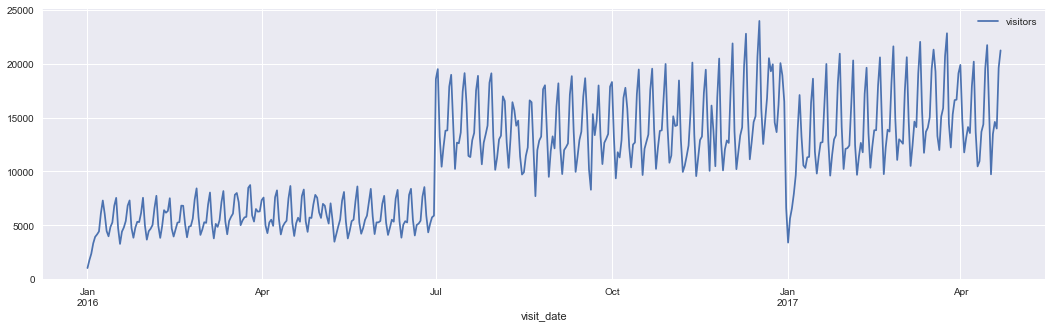

In [293]:
ax = visitors_by_date.plot(figsize=[18,5])

Observations:
- There is a big jump in Jul 2016.
    - Could be new stores joining the Air platform?
- Appearent weekly patterns
- Big dip in Jan 2017

### Total vistors each day-of-week, all stores

In [294]:
air_visits.head()

,air_store_id,visit_date,visitors,id
0,air_ba937bf13d40fb24,2016-01-13,25,air_ba937bf13d40fb24_2016-01-13
1,air_ba937bf13d40fb24,2016-01-14,32,air_ba937bf13d40fb24_2016-01-14
2,air_ba937bf13d40fb24,2016-01-15,29,air_ba937bf13d40fb24_2016-01-15
3,air_ba937bf13d40fb24,2016-01-16,22,air_ba937bf13d40fb24_2016-01-16
4,air_ba937bf13d40fb24,2016-01-18,6,air_ba937bf13d40fb24_2016-01-18


In [295]:
air_visits['weekday'] = air_visits.visit_date.dt.weekday

In [296]:
air_visits.head()

,air_store_id,visit_date,visitors,id,weekday
0,air_ba937bf13d40fb24,2016-01-13,25,air_ba937bf13d40fb24_2016-01-13,2
1,air_ba937bf13d40fb24,2016-01-14,32,air_ba937bf13d40fb24_2016-01-14,3
2,air_ba937bf13d40fb24,2016-01-15,29,air_ba937bf13d40fb24_2016-01-15,4
3,air_ba937bf13d40fb24,2016-01-16,22,air_ba937bf13d40fb24_2016-01-16,5
4,air_ba937bf13d40fb24,2016-01-18,6,air_ba937bf13d40fb24_2016-01-18,0


In [297]:
visitors_by_weekday = air_visits.groupby('weekday')['visitors'].sum()

Text(0.5,0,'Weekday (Monday=0, Sunday=6)')

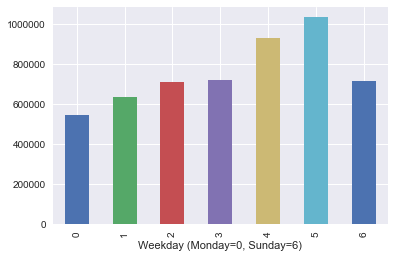

In [298]:
ax = visitors_by_weekday.plot.bar()
ax.set_xlabel('Weekday (Monday=0, Sunday=6)')

Observations:
- Fridays and Sundays have the most visitors

### Which days are we predicting

Which days do we already know?

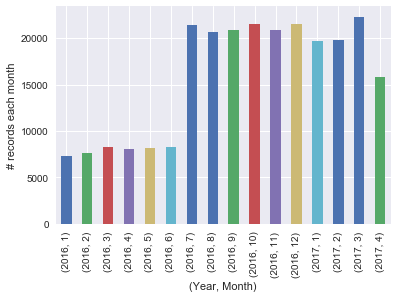

In [311]:
from helper.ploting import plotDatesByYeamMonth
plotDatesByYeamMonth(air_visits.visit_date)

Which days are we predicting?

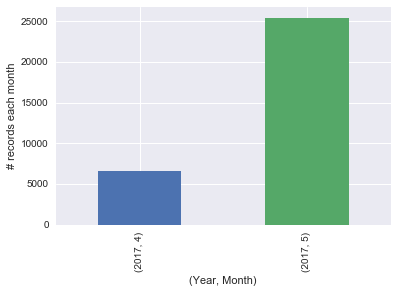

In [310]:
plotDatesByYeamMonth(stores_to_pred.visit_date)

Summary:
- Already know: 2016/1 ~ 2017/4 (16 months)
- To predict: 2017/4 ~ 2017/5 (1 following month)

## Explore `reserves` data

In [302]:
reserves.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


What **time of day** do people plan to visit?
- Mostly dinner time (18~20 o'clock)

In [303]:
reserves.visit_datetime = pd.to_datetime(reserves.visit_datetime)

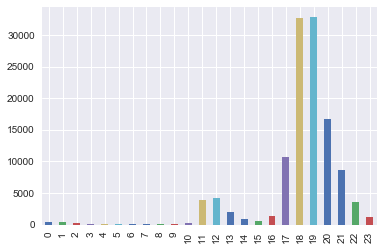

In [304]:
reserves.visit_datetime\
    .dt.hour\
    .value_counts()\
    .sort_index()\
    .plot.bar()

How long do people reserve ahead of time?
- Mostly within a few hours
- Multiples of 24hrs ahead of time

In [305]:
reserves.reserve_datetime = pd.to_datetime(reserves.reserve_datetime)
reserves['reserve_ahead'] = reserves.visit_datetime - reserves.reserve_datetime

In [306]:
reserves['hours_ahead'] = reserves.reserve_ahead / pd.Timedelta('1 hour')

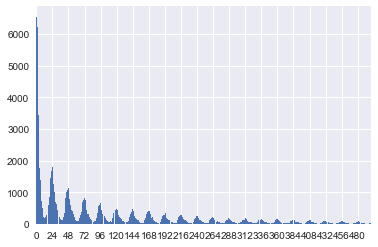

In [307]:
ax = reserves.hours_ahead.hist(bins=10000)
ax.set_xlim([0,500])
ax.set_xticks(np.arange(0, 500, 24))